<a href="https://colab.research.google.com/github/Syaroful/syaroful-pcvk-semester-5/blob/main/syaroful_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhamad Syaroful Anam | TI - 3G | 2141720108


---



## Import library

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

**Transformasi linear brightness**




mengubah tingkat kecerahan citra
--------------------------------
masukkan nilai kecerahan : 20


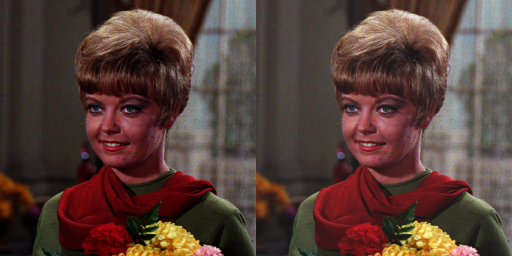

In [2]:
print ('mengubah tingkat kecerahan citra')
print ('--------------------------------')
try:
  brightness = int(input('masukkan nilai kecerahan : '))
except ValueError:
  print('error, not a number')

original = cv.imread('/content/drive/MyDrive/Kuliah/Semester_5/PCVK/image/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


**Invers Citra**

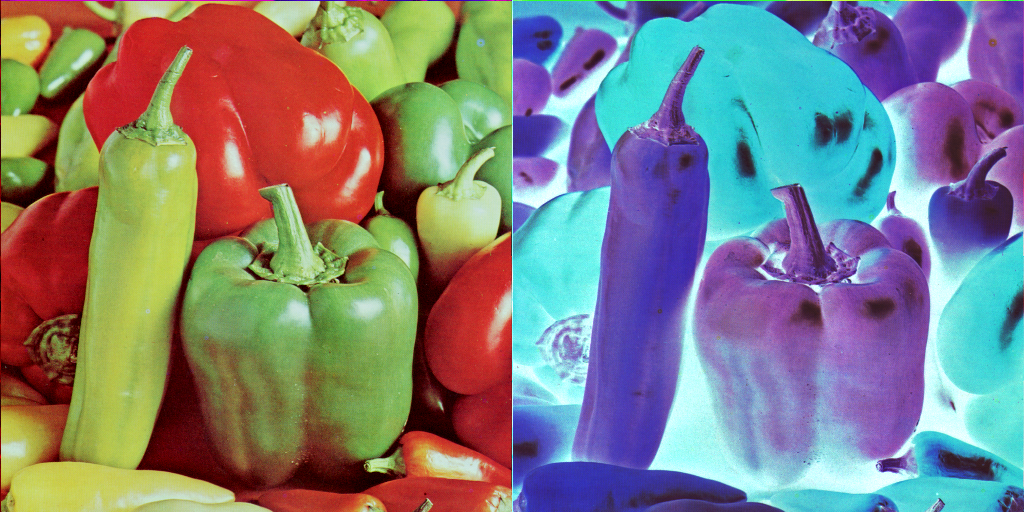

In [9]:
pepper = cv.imread('/content/drive/MyDrive/Kuliah/Semester_5/PCVK/image/peppers.tiff')
height, width, channels = pepper.shape
inverted_pepper = np.copy(pepper)

for i in range(channels):
    inverted_pepper[:, :, i] = 255 - inverted_pepper[:, :, i]

frame1 = cv.hconcat((pepper, inverted_pepper))
cv2_imshow(frame1)

**Contrast Transformation**

 Mengubah kontras dan tingkat kecerahan citra
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 70
Masukkan nilai kontras [1.0 - 3.0]: 2


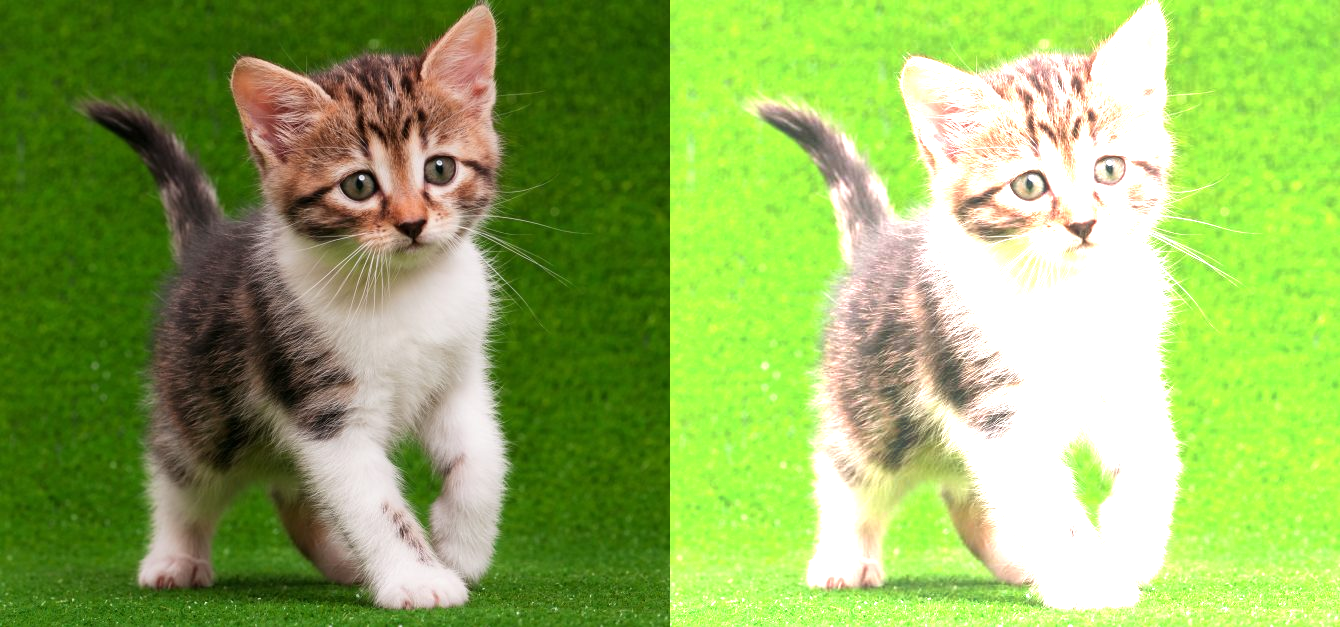

In [10]:
print(' Mengubah kontras dan tingkat kecerahan citra')
print('----------------------------------------------')

#input kecerahan dan kontras
brght = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
ctr = float(input("Masukkan nilai kontras [1.0 - 3.0]: "))

# mengubah kecerahana dan kontras berdasarkan inputan
cat1 = cv.imread('/content/drive/MyDrive/Kuliah/Semester_5/PCVK/image/kitten01.jpg')
adjusted_cat1 = cv.convertScaleAbs(cat1, alpha=ctr, beta=brght)

frame2 = cv.hconcat((cat1, adjusted_cat1))
cv2_imshow(frame2)

**Logarithmic Brightness Transformation**

 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------
Masukkan nilai kecerahan:40


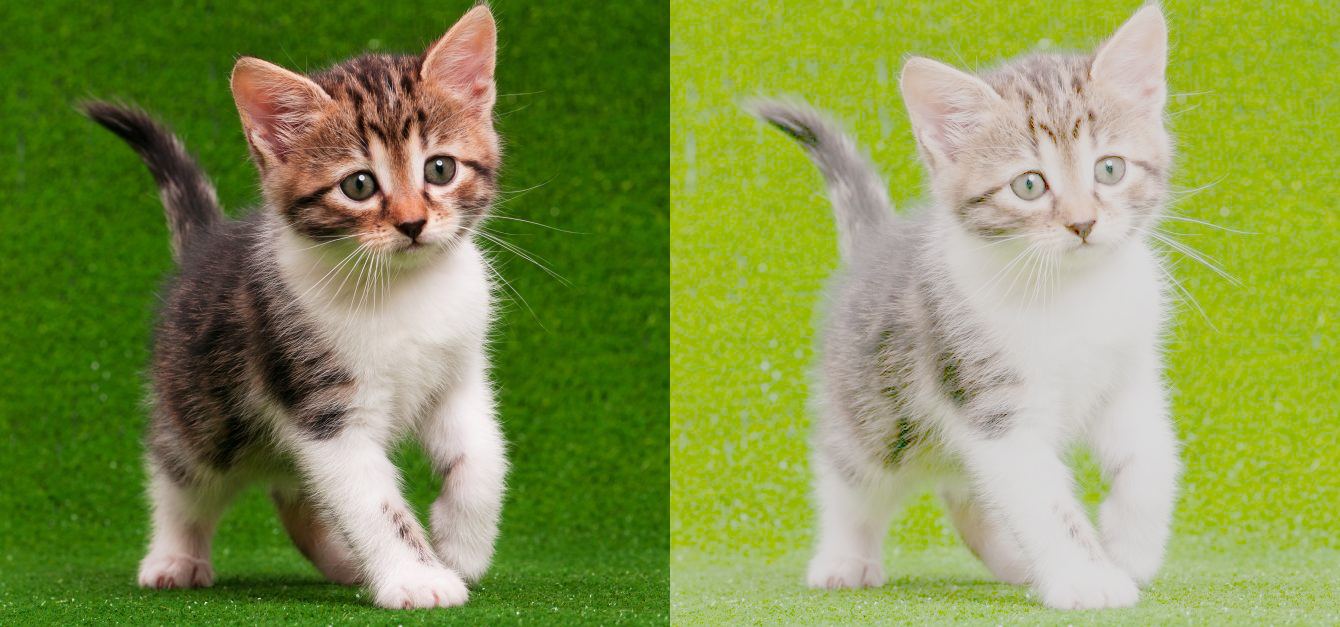

In [15]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------')

try:
  bvalue = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

cat2 = cv.imread('/content/drive/MyDrive/Kuliah/Semester_5/PCVK/image/kitten01.jpg')
brightness_image = np.zeros(cat2.shape, cat2.dtype)

for y in range(cat2.shape[0]):
  for x in range(cat2.shape[1]):
    for c in range(cat2.shape[2]):
      brightness_image[y,x,c] = np.clip(bvalue*  (np.log(1 + cat2[y,x,c])), 0 , 255)

final_frame = cv.hconcat((cat2, brightness_image))
cv2_imshow(final_frame)

**Grayscale Transformation**



* Averaging



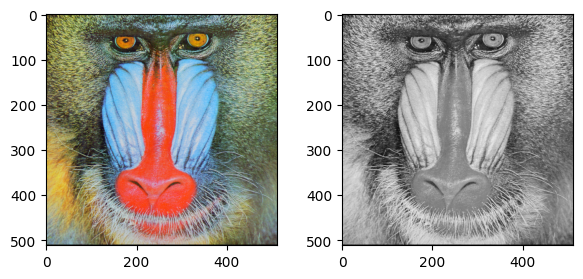

In [17]:
bro1 = cv.imread('/content/drive/MyDrive/Kuliah/Semester_5/PCVK/image/mandrill.tiff')
grayscale_bro1 = cv.cvtColor(bro1, cv.COLOR_BGR2GRAY)
fig, (original, gray_bro1) = plt.subplots(1, 2, figsize=(7, 3))

original.imshow(cv.cvtColor(bro1, cv.COLOR_BGR2RGB))
gray_bro1.imshow(grayscale_bro1, cmap='gray')

plt.show()

* Lightness

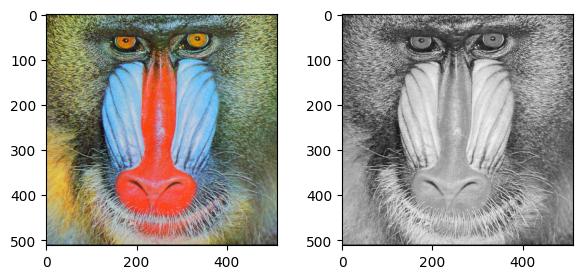

In [20]:
bro2 = cv.imread('/content/drive/MyDrive/Kuliah/Semester_5/PCVK/image/mandrill.tiff')
hls_bro = cv.cvtColor(bro2, cv.COLOR_BGR2HLS)
l_channel = hls_bro[:, :, 1]
fig, (original, ltbro) = plt.subplots(1, 2, figsize=(7, 3))

original.imshow(cv.cvtColor(bro2, cv.COLOR_BGR2RGB))
ltbro.imshow(l_channel, cmap='gray')

plt.show()

* Luminance

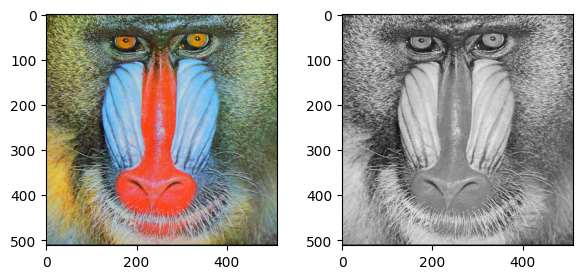

In [23]:
bro3 = cv.imread('/content/drive/MyDrive/Kuliah/Semester_5/PCVK/image/mandrill.tiff')
yuv_bro = cv.cvtColor(bro3, cv.COLOR_BGR2YUV)
y_channel = yuv_bro[:, :, 0]
fig, (original, lmbro) = plt.subplots(1, 2, figsize=(7, 3))

original.imshow(cv.cvtColor(bro3, cv.COLOR_BGR2RGB))
lmbro.imshow(y_channel, cmap='gray')

plt.show()

**Tugas praktikum**

Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale

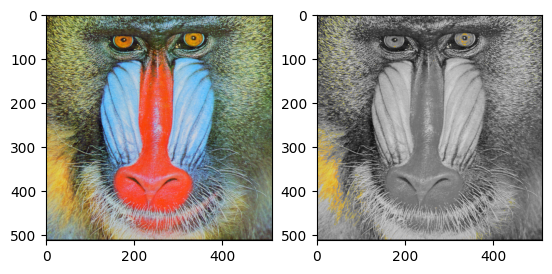

In [24]:
bro = cv.imread('/content/drive/MyDrive/Kuliah/Semester_5/PCVK/image/mandrill.tiff')
bro_rgb = cv.cvtColor(bro, cv.COLOR_BGR2RGB)

lower_yellow = np.array([150, 150, 0], dtype=np.uint8)
upper_yellow = np.array([255, 255, 100], dtype=np.uint8)
mask_yellow = cv.inRange(bro_rgb, lower_yellow, upper_yellow)

# invers mask kuning (kuning menjadi putih, latar belakang menjadi hitam)
mask_yellow_inv = cv.bitwise_not(mask_yellow)

# mengubah background menjadi gray
gray = cv.cvtColor(bro, cv.COLOR_BGR2GRAY)
bro = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# menggabungkan gambar kuning dan background
out = cv.bitwise_and(bro_rgb, bro_rgb, mask=mask_yellow)
out_bg = cv.bitwise_and(bro, bro, mask=mask_yellow_inv)
result = cv.add(out, out_bg)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(bro_rgb)
ax[1].imshow(result)
plt.show()
